## Clasificación de imágenes
Para este ejemplo vas a montar un clasificador de imágenes del 0 al 9.

In [2]:
import numpy as np

In [1]:
from sklearn.datasets import load_digits
digits = load_digits() # 8x8 = 64 pixels  -- Very clean Dataset 

#### Now that you have the dataset loaded you can use the commands below

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [5]:
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [11]:
set(digits.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

#### Check the dataset

In [7]:
import pandas as pd

df = pd.DataFrame(data= digits['data'])
df['target'] = digits['target']
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


#### Check the target

In [8]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
digits.target[0:50]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0])

In [9]:
print(digits.data[0].reshape(8,8))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


#### Plot some numbers

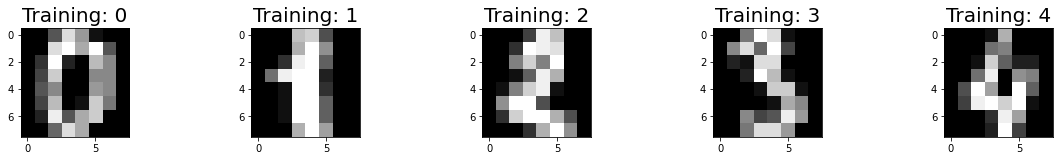

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    #plt.title('Training: %i\n' % label, fontsize = 20)
    plt.title('Training: ' + str(label), fontsize = 20)

### Splitting Data into Training and Test Sets (Digits Dataset)

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data,
                                                   digits.target,
                                                   test_size = 0.25,
                                                   random_state=0)

In [35]:
x_train

array([[ 0.,  3., 13., ..., 12.,  9.,  1.],
       [ 0.,  0.,  1., ..., 13.,  1.,  0.],
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]])

In [12]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [13]:
logisticRegr.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### To predict

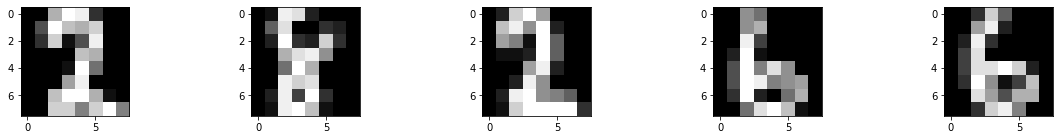

In [14]:
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(x_test[0:5], y_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray);

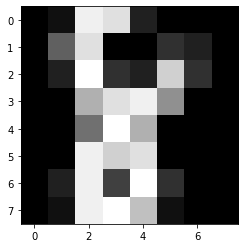

In [22]:
#plt.rcParams['figure.figsize'] = , 2
first_test_image = x_test[1]
plt.imshow(np.reshape(first_test_image, (8,8)), cmap=plt.cm.gray);

In [23]:
x_test[1]

array([ 0.,  1., 15., 14.,  2.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,
        3.,  2.,  0.,  0.,  2., 16.,  3.,  2., 13.,  3.,  0.,  0.,  0.,
       11., 14., 15.,  9.,  0.,  0.,  0.,  0.,  7., 16., 11.,  0.,  0.,
        0.,  0.,  0., 15., 13., 14.,  0.,  0.,  0.,  0.,  2., 15.,  4.,
       16.,  3.,  0.,  0.,  0.,  1., 15., 16., 12.,  1.,  0.,  0.])

In [21]:
x_test[0:1]

array([[ 0.,  0., 11., 16., 15.,  3.,  0.,  0.,  0.,  5., 16., 12., 11.,
        13.,  0.,  0.,  0.,  3., 13.,  1.,  5., 15.,  0.,  0.,  0.,  0.,
         0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,
         0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0., 12., 16.,
        16., 11.,  1.,  0.,  0.,  0., 13., 13.,  8., 13., 16.,  8.]])

In [24]:
logisticRegr.predict(x_test[1:2])
# logisticRegr.predict(x_test[1:2])

array([8])

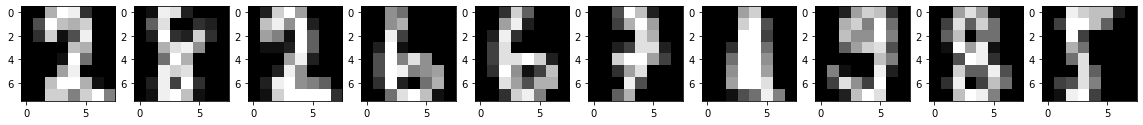

In [25]:
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(x_test[0:10], y_test[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray);

In [26]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [27]:
y_test[:10]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

### Probabilities

In [30]:
y_test[1:2]

array([8])

In [38]:
logisticRegr.predict_proba(x_test[1:2])[0][4]

0.2285147161607323

In [21]:
max(logisticRegr.predict_proba(x_test[0:1])[0])

0.9999999986065224

In [22]:
y_test[:10]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

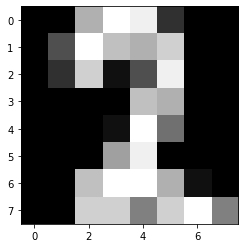

In [23]:
pred = x_test[logisticRegr.predict(x_test) == y_test][0]
plt.imshow(pred.reshape(8,8), cmap=plt.cm.gray);

### Measuring Model Performance (Digits Dataset)

In [39]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score * 100, "%")

95.33333333333334 %


### Matriz de confusión

Eje horizontal: falso positivo

Eje vertical: falso negativo

In [40]:
import sklearn.metrics as metrics
predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


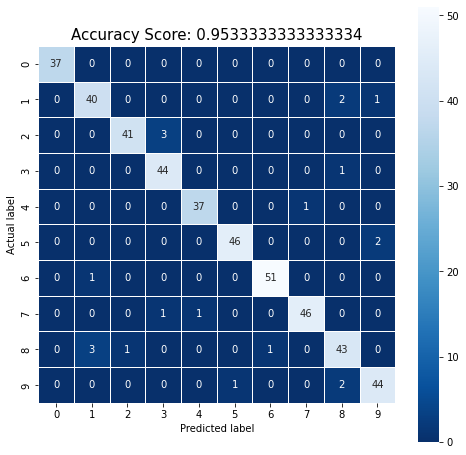

In [44]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

<AxesSubplot:>

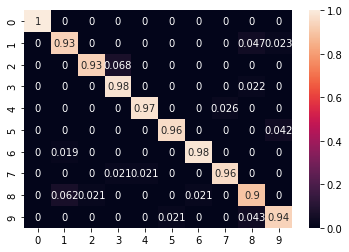

In [43]:
sns.heatmap(metrics.confusion_matrix(y_test, predictions, normalize='true'), annot=True)

In [33]:
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(y_test, predictions)

array([[[413,   0],
        [  0,  37]],

       [[402,   5],
        [  3,  40]],

       [[405,   1],
        [  4,  40]],

       [[401,   4],
        [  2,  43]],

       [[411,   1],
        [  1,  37]],

       [[401,   1],
        [  2,  46]],

       [[398,   0],
        [  1,  51]],

       [[401,   1],
        [  2,  46]],

       [[398,   4],
        [  5,  43]],

       [[398,   5],
        [  2,  45]]], dtype=int64)